# H1B Data Analysis
This project explores the job market and jobs held by H1B workers in the United States from 2011 to 2016. The goal of this project is to look at the computer science market for workers using an H1B visa. 

# Data Preparation and Cleaning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('h1b_kaggle.csv')

In [102]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [103]:
df.tail()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550
3002457,3002458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ALTANTA, GEORGIA",-84.387982,33.748995


From the tail we can see some missing values in key columns. For this project I will require rows to have non-null values for CASE_STATUS, EMPLOYER_NAME, JOB_TITLE, FULL_TIME_POSITION, PREVAILING_WAGE, and YEAR.

In [104]:
df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [105]:
df = df.dropna(subset=['CASE_STATUS', 'EMPLOYER_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR'], how='any')

In [106]:
df.shape

(3002311, 11)

# Exploratory Analysis and Visualization
## Case Status

In [107]:
df['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

In [108]:
values = df['CASE_STATUS'].value_counts().keys().tolist()
count = df['CASE_STATUS'].value_counts().tolist()
df['CASE_STATUS'].value_counts()

CERTIFIED                                             2615609
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94279
WITHDRAWN                                               89746
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

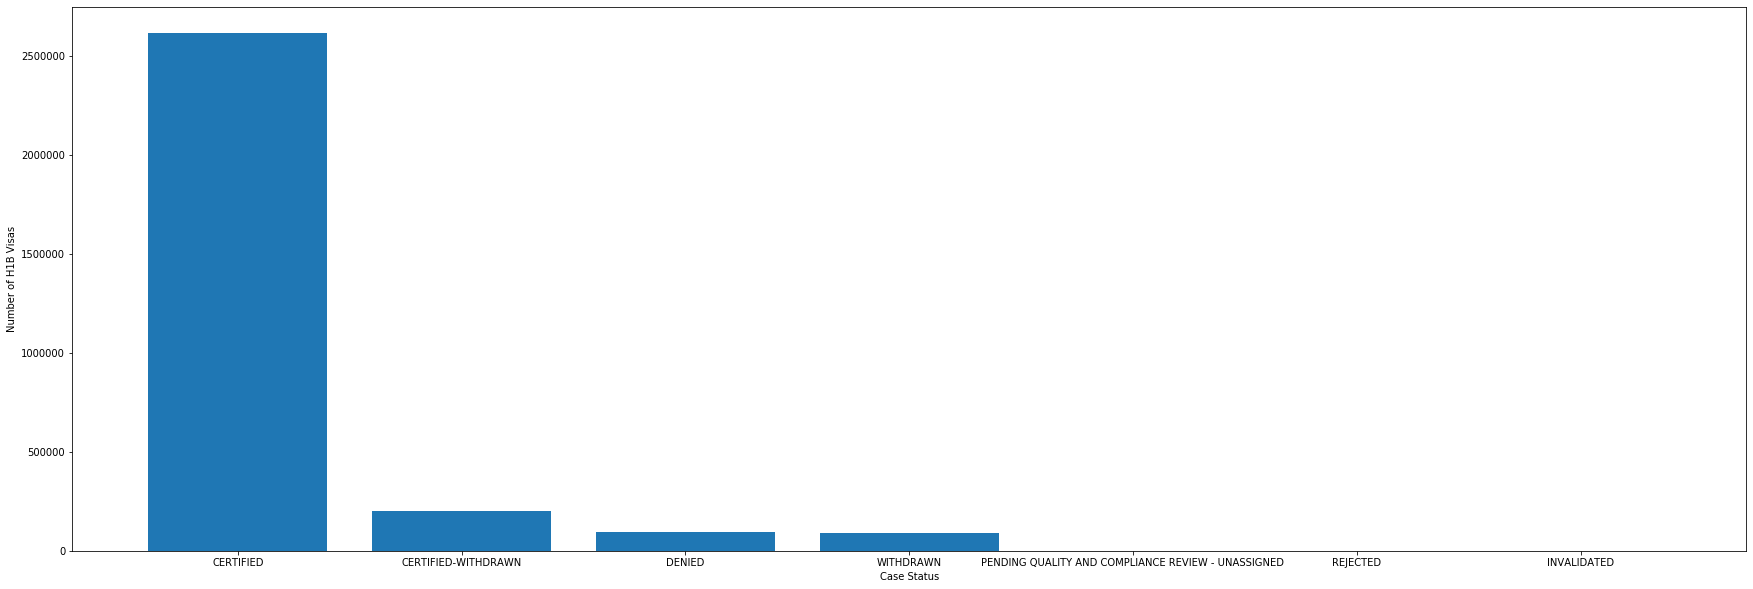

In [115]:
plt.figure(figsize=(30, 10))
plt.bar(values, count)
plt.xlabel('Case Status')
plt.ylabel('Number of H1B Visas')
plt.show()

From the histogram we can see that the overwhelming majority of H1B visa holders are certified.

## Income 

To get the minimum income we simply use the min() command. I find the lowest salary among the 3 million H1B workers is \\$0.00.

In [116]:
df['PREVAILING_WAGE'].min()

0.0

To get the maximum income I used the max() command. The richest H1B worker is very wealthy with a salary of almost \\$7 Billion.

In [117]:
df['PREVAILING_WAGE'].max()

6997606720.0

The median salary can be found using the median() command. The median salary among H1B workers is around \\$65k which is about average in the United States.

In [118]:
df['PREVAILING_WAGE'].median()

65021.0

The mean salary can be found using the mean() command. What is very insteresting is that the super wealthy have skewed the mean very far from the median. This suggests that the distribution is very heavily skewed right.

In [119]:
df['PREVAILING_WAGE'].mean()

146999.97216764567

The standard deviation can be found using the std() command. The standard deviation is very large which highlights the extreme income disparity among various people.

In [120]:
df['PREVAILING_WAGE'].std()

5287664.029967046

Below I find it useful to break up people based on arbitrary income brackets. This helps in estimating the distribution plot of everyone's salaries. 

In [167]:
df['INCOME_BRACKET'] = ''
df.loc[df['PREVAILING_WAGE'] < 10000, 'INCOME_BRACKET'] = '0-10000'
df.loc[(df['PREVAILING_WAGE'] >= 10000) & (df['PREVAILING_WAGE'] < 20000), 'INCOME_BRACKET'] = '10k-20k'
df.loc[(df['PREVAILING_WAGE'] >= 20000) & (df['PREVAILING_WAGE'] < 30000), 'INCOME_BRACKET'] = '20k-30k'
df.loc[(df['PREVAILING_WAGE'] >= 30000) & (df['PREVAILING_WAGE'] < 40000), 'INCOME_BRACKET'] = '30k-40k'
df.loc[(df['PREVAILING_WAGE'] >= 40000) & (df['PREVAILING_WAGE'] < 50000), 'INCOME_BRACKET'] = '40k-50k'
df.loc[(df['PREVAILING_WAGE'] >= 50000) & (df['PREVAILING_WAGE'] < 60000), 'INCOME_BRACKET'] = '50k-60k'
df.loc[(df['PREVAILING_WAGE'] >= 60000) & (df['PREVAILING_WAGE'] < 70000), 'INCOME_BRACKET'] = '60k-70k'
df.loc[(df['PREVAILING_WAGE'] >= 70000) & (df['PREVAILING_WAGE'] < 80000), 'INCOME_BRACKET'] = '70k-80k'
df.loc[(df['PREVAILING_WAGE'] >= 80000) & (df['PREVAILING_WAGE'] < 90000), 'INCOME_BRACKET'] = '80k-90k'
df.loc[(df['PREVAILING_WAGE'] >= 90000) & (df['PREVAILING_WAGE'] < 100000), 'INCOME_BRACKET'] = '90k-100k'
df.loc[(df['PREVAILING_WAGE'] >= 100000) & (df['PREVAILING_WAGE'] < 200000) , 'INCOME_BRACKET'] = '100k-200k'

After breaking everyone up into arbitrary income brackets we can get a rough estimate of the income distribution. Below I use the value_counts() method. The method counts the number of people that fall into each income bracket. Below we can see that a significant portion of people are making around 50k-70k which is where the median lies.

In [122]:
ax = df['INCOME_BRACKET'].value_counts()
ax

60k-70k      655994
50k-60k      613646
70k-80k      429518
40k-50k      340365
100k-200k    308029
80k-90k      278191
90k-100k     193304
30k-40k      144712
20k-30k       25289
200k+         10621
10k-20k        2599
0-10000          43
Name: INCOME_BRACKET, dtype: int64

The graph gives a great visualization of the distribution of income. We can see that the vast majority of people are making under 100k with a very small group of people making over 200k. What is remarkable is that this small group making over 200k is able to skew the mean salary over 80k above the median. 

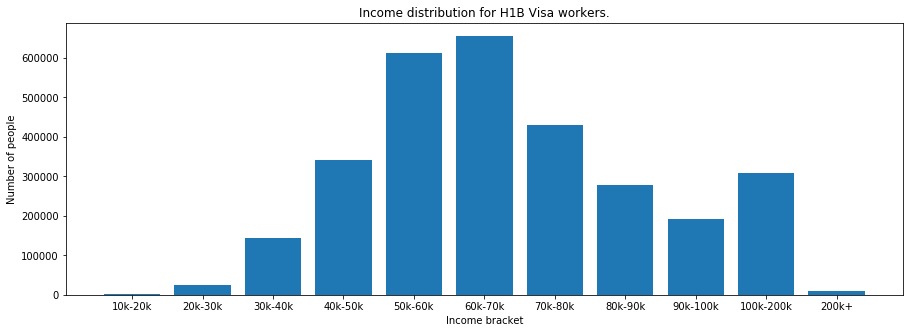

In [124]:
plt.figure(figsize=(15, 5))
x_axis = np.array(['10k-20k', 
                   '20k-30k', 
                   '30k-40k', 
                   '40k-50k', 
                   '50k-60k', 
                   '60k-70k', 
                   '70k-80k', 
                   '80k-90k', 
                   '90k-100k', 
                   '100k-200k', 
                   '200k+'])
y_axis = ax.loc[x_axis]
plt.bar(x_axis, y_axis)
plt.xlabel('Income bracket')
plt.ylabel('Number of people')
plt.title('Income distribution for H1B Visa workers.')
plt.show()

The above plot shows that the graph peaks around the 60k-70k income bracket. The graph is skewed right although this is not obvious since everyone making over 200k is grouped into one income bracket. 

# Ask and answer question about the data

## How many H1b Visa holders work in computer/software related fields?

In [19]:
df['JOB_TITLE'].value_counts().keys().tolist()
#  value_counts creates a map
#      key: unique job title
#      value: number of occurances
#  keys().tolist() puts the keys into an array

['PROGRAMMER ANALYST',
 'SOFTWARE ENGINEER',
 'COMPUTER PROGRAMMER',
 'SYSTEMS ANALYST',
 'SOFTWARE DEVELOPER',
 'BUSINESS ANALYST',
 'COMPUTER SYSTEMS ANALYST',
 'TECHNOLOGY LEAD - US',
 'SENIOR SOFTWARE ENGINEER',
 'TECHNOLOGY ANALYST - US',
 'ASSISTANT PROFESSOR',
 'SENIOR CONSULTANT',
 'CONSULTANT',
 'PHYSICAL THERAPIST',
 'PROJECT MANAGER',
 'DATABASE ADMINISTRATOR',
 'ACCOUNTANT',
 'COMPUTER PROGRAMMER ANALYST',
 'RESEARCH ASSOCIATE',
 'DEVELOPER',
 'ASSOCIATE',
 'ANALYST',
 'LEAD ENGINEER',
 'COMPUTER SYSTEMS ENGINEER',
 'SENIOR SOFTWARE DEVELOPER',
 'BUSINESS SYSTEMS ANALYST',
 'SYSTEMS ENGINEER - US',
 'PROGRAMMER/ANALYST',
 'MARKET RESEARCH ANALYST',
 'MANAGER',
 'FINANCIAL ANALYST',
 'SYSTEMS ENGINEER',
 'WEB DEVELOPER',
 'POSTDOCTORAL FELLOW',
 'APPLICATION DEVELOPER',
 'JAVA DEVELOPER',
 'CONSULTANT - US',
 'QUALITY ASSURANCE ANALYST',
 'MECHANICAL ENGINEER',
 'SOFTWARE DEVELOPMENT ENGINEER',
 'PROJECT MANAGER - US',
 'QA ANALYST',
 'COMPUTER PROGRAMMER/CONFIGURER 2',
 'SY

To answer this question we need to consider which job titles fit under the description of computer and software fields. The job titles that I will consider for this project include:
    - PROGRAMMER ANALYST
    - SOFTWARE ENGINEER
    - COMPUTER PROGRAMMER,
    - SOFTWARE DEVELOPER
    - SENIOR SOFTWARE ENGINEER
    - DATABASE ADMINISTRATOR,
    - DEVELOPER
    - COMPUTER SYSTEMS ENGINEER
    - SENIOR SOFTWARE DEVELOPER,
    - WEB DEVELOPER,
    - SOFTWARE DEVELOPMENT ENGINEER
    - PROGRAMMER
    - NETWORK ENGINEER
    - COMPUTER PROGRAMMERS
    - SOFTWARE QUALITY ASSURANCE ENGINEER
    - SOFTWARE TEST ENGINEER,
    - SOFTWARE PROGRAMMER
    - SENIOR DEVELOPER
    - COMPUTER SOFTWARE ENGINEER
Keep in mind this is far from all the unique software/computer related job titles in this dataset. This list would be too long if I include all of the relevant job titles. The list I selected should be sufficient to answer the question.

In [20]:
ax = df['JOB_TITLE'].value_counts()
jobs = [
    'PROGRAMMER ANALYST',
    'SOFTWARE ENGINEER',
    'COMPUTER PROGRAMMER',
    'SOFTWARE DEVELOPER',
    'SENIOR SOFTWARE ENGINEER',
    'DATABASE ADMINISTRATOR',
    'DEVELOPER',
    'COMPUTER SYSTEMS ENGINEER',
    'SENIOR SOFTWARE DEVELOPER',
    'WEB DEVELOPER',
    'SOFTWARE DEVELOPMENT ENGINEER',
    'PROGRAMMER',
    'NETWORK ENGINEER',
    'COMPUTER PROGRAMMERS',
    'SOFTWARE QUALITY ASSURANCE ENGINEER',
    'SOFTWARE PROGRAMMER',
    'SENIOR DEVELOPER',
    'COMPUTER SOFTWARE ENGINEER'
]
sum = 0
for j in jobs:
    sum += ax.loc[j] # Adds the value to the total sum
sum

607692

## Answer: Approximately 600k H1B visa holders.

## What is the income distribution for computer and software jobs?

In [21]:
jobs = [
    'PROGRAMMER ANALYST',
    'SOFTWARE ENGINEER',
    'COMPUTER PROGRAMMER',
    'SOFTWARE DEVELOPER',
    'SENIOR SOFTWARE ENGINEER',
    'DATABASE ADMINISTRATOR',
    'DEVELOPER',
    'COMPUTER SYSTEMS ENGINEER',
    'SENIOR SOFTWARE DEVELOPER',
    'WEB DEVELOPER',
    'SOFTWARE DEVELOPMENT ENGINEER',
    'PROGRAMMER',
    'NETWORK ENGINEER',
    'COMPUTER PROGRAMMERS',
    'SOFTWARE QUALITY ASSURANCE ENGINEER',
    'SOFTWARE PROGRAMMER',
    'SENIOR DEVELOPER',
    'COMPUTER SOFTWARE ENGINEER'
]

ax = df[(df['JOB_TITLE'].isin(jobs))]
ax

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,INCOME_BRACKET
9283,9284,CERTIFIED-WITHDRAWN,GOOGLE INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,SOFTWARE ENGINEER,Y,154440.0,2016.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052,100k-200k
9289,9290,CERTIFIED,GOOGLE INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,SOFTWARE ENGINEER,Y,154440.0,2016.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052,100k-200k
9295,9296,CERTIFIED-WITHDRAWN,GOOGLE INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,SOFTWARE ENGINEER,Y,184122.0,2016.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052,100k-200k
9304,9305,CERTIFIED-WITHDRAWN,GOOGLE INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,SOFTWARE ENGINEER,Y,154440.0,2016.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052,100k-200k
9306,9307,CERTIFIED-WITHDRAWN,GOOGLE INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,SOFTWARE ENGINEER,Y,184122.0,2016.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052,100k-200k
...,...,...,...,...,...,...,...,...,...,...,...,...
3002395,3002396,WITHDRAWN,COLLABERA INC.; PREVIOUSLY KNOWN AS GCI,Computer Programmers,COMPUTER PROGRAMMER,Y,54142.0,2011.0,"COLUMBIA, SOUTH CAROLINA",-81.034814,34.000710,50k-60k
3002400,3002401,WITHDRAWN,"ITECH US, INC.","Software Developers, Applications",SOFTWARE ENGINEER,Y,83762.0,2011.0,"MCLEAN, VIRGINIA",-77.177260,38.933868,80k-90k
3002404,3002405,WITHDRAWN,"PROPERTY SOLUTIONS INTERNATIONAL, INC.","Software Developers, Applications",SOFTWARE ENGINEER,Y,56389.0,2011.0,"PROVO, UTAH",-111.658534,40.233844,50k-60k
3002427,3002428,WITHDRAWN,"TRISYNC TECHNOLOGIES, INC.",Computer Programmers,COMPUTER PROGRAMMER,Y,55245.0,2011.0,"EDISON, NEW JERSEY",-74.412095,40.518715,50k-60k


In [22]:
ax2 = ax['INCOME_BRACKET'].value_counts()
ax2

50k-60k      181452
60k-70k      169882
70k-80k       81069
40k-50k       59676
80k-90k       43788
100k-200k     36848
90k-100k      28906
30k-40k        5200
200k+           495
20k-30k         346
10k-20k          25
0-10000           5
Name: INCOME_BRACKET, dtype: int64

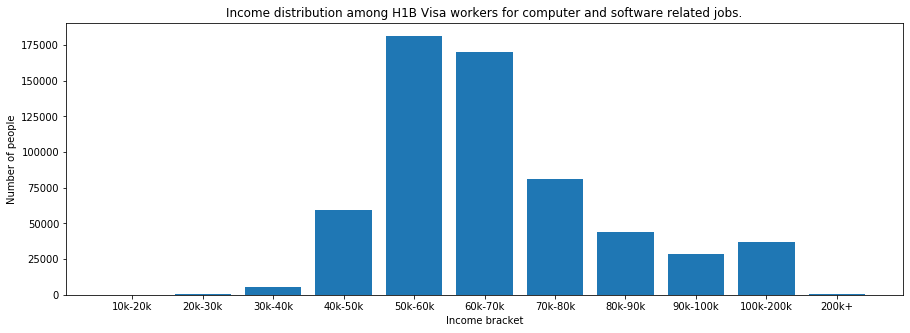

In [98]:
plt.figure(figsize=(15, 5))
x_axis = np.array(['10k-20k', 
                   '20k-30k', 
                   '30k-40k', 
                   '40k-50k', 
                   '50k-60k', 
                   '60k-70k', 
                   '70k-80k', 
                   '80k-90k', 
                   '90k-100k', 
                   '100k-200k', 
                   '200k+'])
y_axis = ax2.loc[x_axis]
plt.bar(x_axis, y_axis)
plt.xlabel('Income bracket')
plt.ylabel('Number of people')
plt.title('Income distribution among H1B Visa workers for computer and software related jobs.')
plt.show()

In [24]:
ax['PREVAILING_WAGE'].mean()

146283.32018263327

In [25]:
ax['PREVAILING_WAGE'].median()

62546.0

In [26]:
ax['PREVAILING_WAGE'].std()

3468885.360754675

From the distribution we can see that computer and software fields salaries are slightly below the mean and median compared to all fields. The mean salary is roughly the same but the median salary is about \\$3000 less than the overall median. The shape and proportions among the income brackets are nearly identical. However computer and software jobs more heavily fall in the 50k-60k income bracket. Among all jobs held by H1B Visa holders this distribution falls most heavily in the 60k-70k income bracket. What's also interesting to note is that the standard deviation of the computer/software jobs have a slightly lower standard deviation of \\$3.5 million compared to a standard deviation of \\$5.3 million among all jobs.

## What is the mean and median income of H1B Visa holders by state?

In [70]:
df['STATE'] = ''
states = np.array([
    'ALABAMA',
    'ALASKA',
    'ARIZONA',
    'ARKANSAS',
    'CALIFORNIA',
    'COLORADO',
    'CONNECTICUT',
    'DELAWARE',
    'FLORIDA',
    'GEORGIA',
    'HAWAII',
    'IDAHO',
    'ILLINOIS',
    'INDIANA',
    'IOWA',
    'KANSAS',
    'KENTUCKY',
    'LOUISIANA',
    'MAINE',
    'MARYLAND',
    'MASSACHUSETTS',
    'MICHIGAN',
    'MINNESOTA',
    'MISSISSIPPI',
    'MISSOURI',
    'MONTANA',
    'NEBRASKA',
    'NEVADA',
    'NEW HAMPSHIRE',
    'NEW JERSEY',
    'NEW MEXICO',
    'NEW YORK',
    'NORTH CAROLINA',
    'NORTH DAKOTA',
    'OHIO',
    'OKLAHOMA',
    'OREGON',
    'PENNSYLVANIA',
    'RHODE ISLAND',
    'SOUTH CAROLINA',
    'TENNESSEE',
    'TEXAS',
    'UTAH',
    'VERMONT',
    'VIRGINIA',
    'WASHINGTON',
    'WEST VIRGINIA',
    'WISCONSIN',
    'WYOMING'
])
stateIncomeMean = np.array([])
stateIncomeMedian = np.array([])
for state in states:
    tempdf = df.loc[df['WORKSITE'].str.contains(", " + state)]
    stateIncomeMean = np.append(stateIncomeMean, np.round(tempdf['PREVAILING_WAGE'].mean(), 2))
    stateIncomeMedian = np.append(stateIncomeMedian, np.round(tempdf['PREVAILING_WAGE'].median(), 2))

Note: South Dakota was removed since there are no jobs on record that have a worksite in South Dakota.

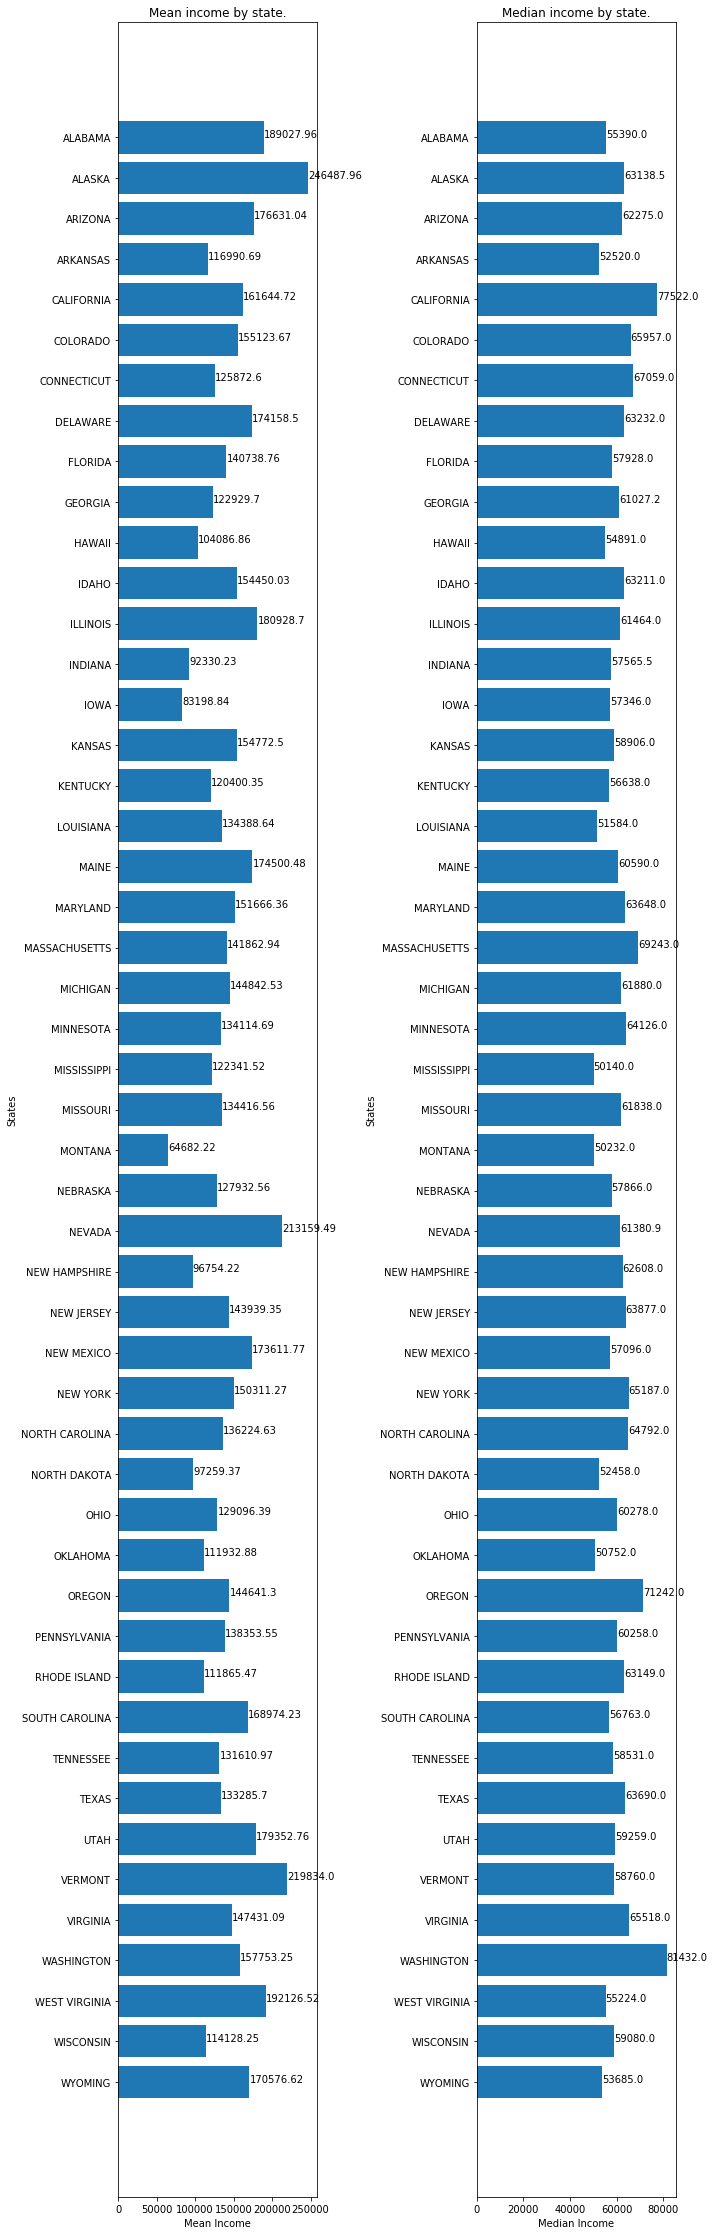

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(10,40))

axes[0].barh(states[::-1], stateIncomeMean[::-1])
for index, value in enumerate(stateIncomeMean[::-1]):
    axes[0].text(value, index, str(value))
axes[0].set_xlabel('Mean Income')
axes[0].set_ylabel('States')
axes[0].set_title("Mean income by state.")

axes[1].barh(states[::-1], stateIncomeMedian[::-1])
for index, value in enumerate(stateIncomeMedian[::-1]):
    axes[1].text(value,index, str(value))
axes[1].set_xlabel('Median Income')
axes[1].set_ylabel('States')
axes[1].set_title("Median income by state.")

fig.subplots_adjust(wspace=0.8)

plt.show()

## What are the top 10 largest employers for computer and software jobs?

In [146]:
jobs = [
    'PROGRAMMER ANALYST',
    'SOFTWARE ENGINEER',
    'COMPUTER PROGRAMMER',
    'SOFTWARE DEVELOPER',
    'SENIOR SOFTWARE ENGINEER',
    'DATABASE ADMINISTRATOR',
    'DEVELOPER',
    'COMPUTER SYSTEMS ENGINEER',
    'SENIOR SOFTWARE DEVELOPER',
    'WEB DEVELOPER',
    'SOFTWARE DEVELOPMENT ENGINEER',
    'PROGRAMMER',
    'NETWORK ENGINEER',
    'COMPUTER PROGRAMMERS',
    'SOFTWARE QUALITY ASSURANCE ENGINEER',
    'SOFTWARE PROGRAMMER',
    'SENIOR DEVELOPER',
    'COMPUTER SOFTWARE ENGINEER'
]

csDF = df[(df['JOB_TITLE'].isin(jobs))]
csDF

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,INCOME_BRACKET
9283,9284,CERTIFIED-WITHDRAWN,GOOGLE INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,SOFTWARE ENGINEER,Y,154440.0,2016.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052,100k-200k
9289,9290,CERTIFIED,GOOGLE INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,SOFTWARE ENGINEER,Y,154440.0,2016.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052,100k-200k
9295,9296,CERTIFIED-WITHDRAWN,GOOGLE INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,SOFTWARE ENGINEER,Y,184122.0,2016.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052,100k-200k
9304,9305,CERTIFIED-WITHDRAWN,GOOGLE INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,SOFTWARE ENGINEER,Y,154440.0,2016.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052,100k-200k
9306,9307,CERTIFIED-WITHDRAWN,GOOGLE INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,SOFTWARE ENGINEER,Y,184122.0,2016.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052,100k-200k
...,...,...,...,...,...,...,...,...,...,...,...,...
3002395,3002396,WITHDRAWN,COLLABERA INC.; PREVIOUSLY KNOWN AS GCI,Computer Programmers,COMPUTER PROGRAMMER,Y,54142.0,2011.0,"COLUMBIA, SOUTH CAROLINA",-81.034814,34.000710,50k-60k
3002400,3002401,WITHDRAWN,"ITECH US, INC.","Software Developers, Applications",SOFTWARE ENGINEER,Y,83762.0,2011.0,"MCLEAN, VIRGINIA",-77.177260,38.933868,80k-90k
3002404,3002405,WITHDRAWN,"PROPERTY SOLUTIONS INTERNATIONAL, INC.","Software Developers, Applications",SOFTWARE ENGINEER,Y,56389.0,2011.0,"PROVO, UTAH",-111.658534,40.233844,50k-60k
3002427,3002428,WITHDRAWN,"TRISYNC TECHNOLOGIES, INC.",Computer Programmers,COMPUTER PROGRAMMER,Y,55245.0,2011.0,"EDISON, NEW JERSEY",-74.412095,40.518715,50k-60k


In [165]:
hashTable = csDF['EMPLOYER_NAME'].value_counts().head(10)
tableKeys = hashTable.keys().tolist()
values = hashTable.loc[tableKeys]
hashTable

TATA CONSULTANCY SERVICES LIMITED                  37560
GOOGLE INC.                                        11302
MICROSOFT CORPORATION                               9038
WIPRO LIMITED                                       8821
LARSEN & TOUBRO INFOTECH LIMITED                    8699
IGATE TECHNOLOGIES INC.                             4943
TECH MAHINDRA (AMERICAS),INC.                       4210
MASTECH, INC., A MASTECH HOLDINGS, INC. COMPANY     3974
V-SOFT CONSULTING GROUP, INC                        2967
NTT DATA, INC.                                      2537
Name: EMPLOYER_NAME, dtype: int64

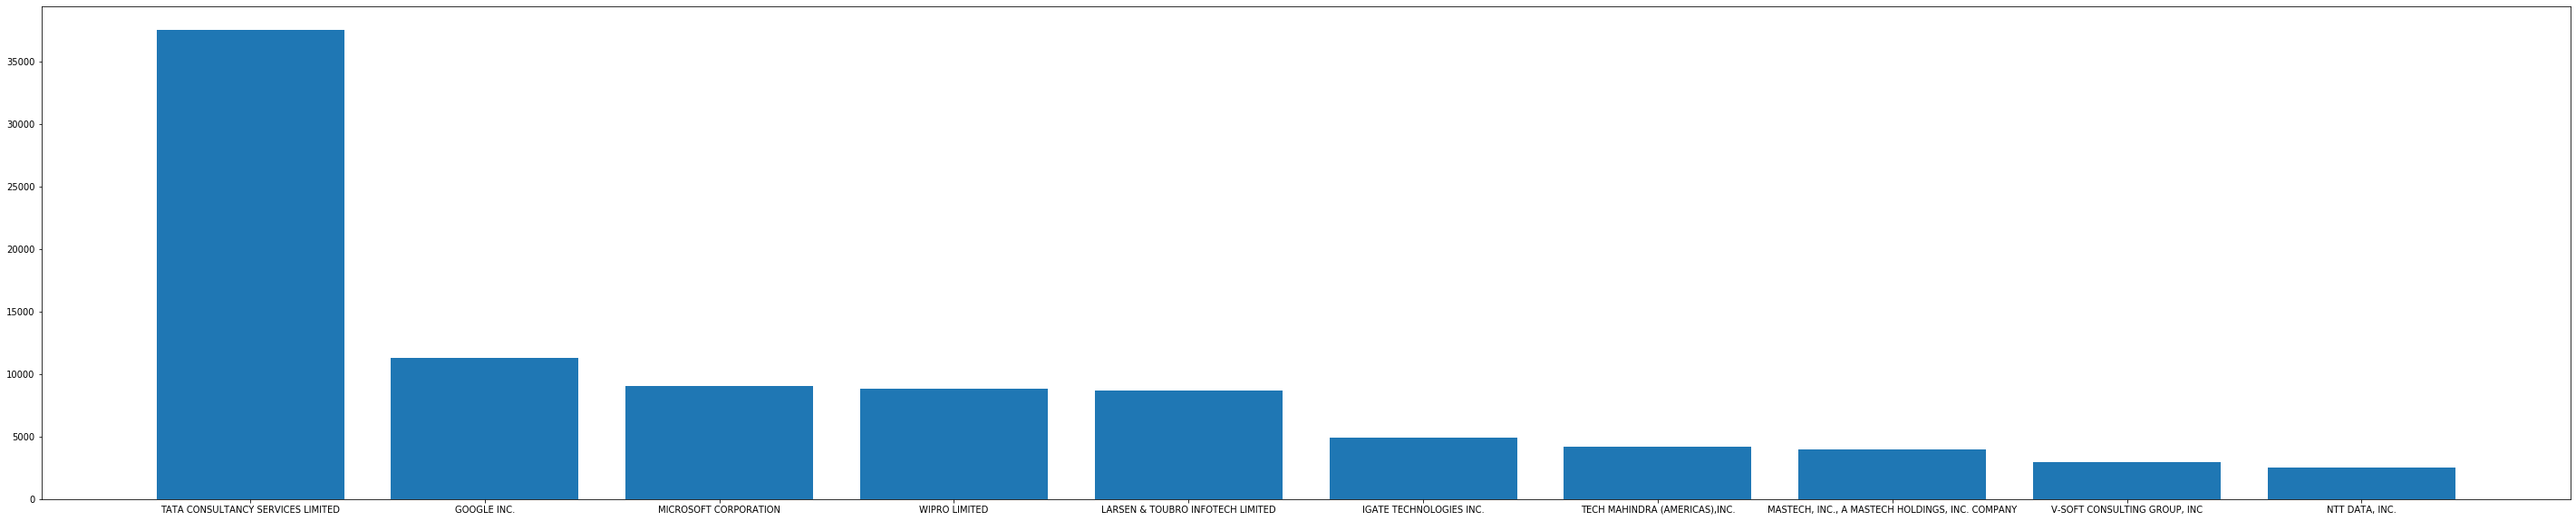

In [166]:
plt.figure(figsize=(50, 10))

plt.bar(tableKeys, values)
plt.show()

## Answer: 
    1. TATA
    2. GOOGLE
    3. MICROSOFT
    4. WIPRO
    5. LARSEN & TOUBRO INFOTECH
    6. IGATE TECHNOLOGIES
    7. TECH MAHINDRA
    8. MASTECH
    9. V-SOFT CONSULTING GROUP
    10. NTT DATA

## What are the most popular fields for people who work in academic or research?

In [6]:
researchDF = df.loc[
    df['JOB_TITLE'].str.contains('PROFESSOR') |
    df['JOB_TITLE'].str.contains('RESEARCH') |
    df['JOB_TITLE'].str.contains('POSTDOCTORAL') |
    df['JOB_TITLE'].str.contains('FELLOW') |
    df['JOB_TITLE'].str.contains('SCIENTIST') |
    df['JOB_TITLE'].str.contains('SCHOLAR')
]
researchDF

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
61,62,CERTIFIED,"SENSORHOUND, INC.",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER AND RESEARCH SCIENTIST,Y,76752.0,2016.0,"WEST LAFAYETTE, INDIANA",-86.908066,40.425869
130,131,CERTIFIED,ENGINE CONTROL SYSTEMS LIMITED,CHIEF EXECUTIVES,VICE PRESIDENT OF RESEARCH AND ENGINEERING,Y,106933.0,2016.0,"OXNARD, CALIFORNIA",-119.177052,34.197505
195,196,CERTIFIED,"SENSORHOUND, INC.",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER AND RESEARCH SCIENTIST,Y,76752.0,2016.0,"WEST LAFAYETTE, INDIANA",-86.908066,40.425869
295,296,CERTIFIED,KAIZEN ANALYTIX LLC,CHIEF EXECUTIVES,"DIRECTOR, OPERATIONS RESEARCH",Y,102190.0,2016.0,"ATLANTA, GEORGIA",-84.387982,33.748995
...,...,...,...,...,...,...,...,...,...,...,...
3002388,3002389,WITHDRAWN,MONTANA STATE UNIVERSITY,Physicists,POSTDOCTORAL RESEARCH ASSOCIATE,Y,43368.0,2011.0,"BOZEMAN, MONTANA",-111.042934,45.676998
3002437,3002438,WITHDRAWN,UNIVERSITY OF MISSISSIPPI MEDICAL CENTER,"Health Specialties Teachers, Postsecondary",ASSISTANT PROFESSOR OF ANESTHESIOLOGY,Y,34510.0,2011.0,"JACKSON, MISSISSIPPI",-90.184810,32.298757
3002439,3002440,WITHDRAWN,NEW YORK UNIVERSITY,"Biological Scientists, All Other",ADJUNCT ASSOCIATE PROFESSOR,Y,37336.0,2011.0,"NEW YORK, NEW YORK",-74.005941,40.712784
3002441,3002442,WITHDRAWN,B & D DENTAL CORP.,Materials Scientists,MATERIALS SCIENTIST,N,70553.6,2011.0,"WEST VALLEY, UTAH",-112.001050,40.691613


In [20]:
researchDF['SOC_NAME'].value_counts().head(10)

Medical Scientists, Except Epidemiologists            14346
Biochemists and Biophysicists                         12663
Biological Scientists, All Other                       8880
MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS             7478
Market Research Analysts and Marketing Specialists     7453
BIOCHEMISTS AND BIOPHYSICISTS                          6039
BIOLOGICAL SCIENTISTS, ALL OTHER                       5524
Chemists                                               4745
Health Specialties Teachers, Postsecondary             4472
Biological Technicians                                 4465
Name: SOC_NAME, dtype: int64

# Summarize your inferences & write a conclusion
## Summary

From the analysis I estimated the number of H1B workers working in computer and software related to be about 600,000 people. Considering that there are 3 million individual items in the data that works out to 20% of the workforce working in tech. I did not realize that such a large percentage of H1B workers work in tech. From this data we can infer that software and computer jobs are extremely popular among H1B visa workers.

I then tried to find out what the income distribution among H1B workers in tech looks like. After filtering the data and plotting a bar chart I found very little difference between the income distribution in tech and the overall income distribution among all jobs. It turns out that tech actually pays slightly lower than the overall average income. 

Moving away from tech I then asked what income looks like on a state level. From the data there does suggest that income varies state by state. What is interesting is that in some states the mean and median income vary dramatically. This may be an indication of either the population of the state or the number of rich people residing in the state. We see how only a very small group of wealthy people can dramatically shift the mean from the median.

Going back into tech I looked for the largest employers for H1B workers who work in tech. What was challenging was finding a way to classify jobs as tech or not tech. I am not an expert on data classification so what I did was filtering jobs based on arbitrary key words. This provided me with a dataset that roughly matched job being in tech. 

Finally I decided to look at the most popular fields in academia and research. I filtered the data and looked at what the top fields are from the dictionary. From the data biological and medical fields were the most popular. Marketing is also a popular field.